## **CIFAR10 image classification**

### **1. Import libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **2. Load the dataset**

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()
print('train_x :', train_x.shape, train_x.ndim, type(train_x))
print('test_x :', test_x.shape, test_x.ndim, type(test_x))

170508288/170498071 [==============================] - 4s 0us/step
train_x : (50000, 32, 32, 3) 4 <class 'numpy.ndarray'>
test_x : (10000, 32, 32, 3) 4 <class 'numpy.ndarray'>


### **3. Explore the data**

In [3]:
target_values = np.unique(train_y)
print('target_values :', target_values)

target_values : [0 1 2 3 4 5 6 7 8 9]


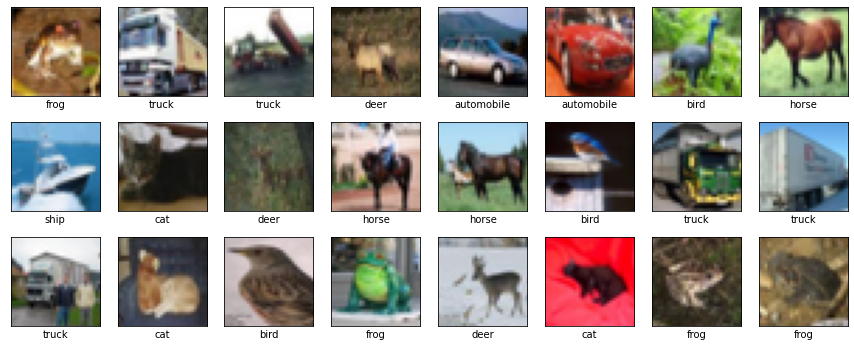

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 6))
for i in range(24):
    plt.subplot(3, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

### **4. Preprocess the data**

In [5]:
print('before scaling :', train_x[0].min(), "/", train_x[0].max())

before scaling : 0 / 255


In [6]:
train_x, test_x = train_x / 255.0, test_x / 255.0
print('after scaling :', train_x[0].min(), "/", train_x[0].max())

after scaling : 0.0 / 1.0


### **5-1. Build/Compile/Train the model**

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5968 - accuracy: 0.4146 - val_loss: 1.3074 - val_accuracy: 0.5342
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2413 - accuracy: 0.5559 - val_loss: 1.1880 - val_accuracy: 0.5728
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1003 - accuracy: 0.6102 - val_loss: 1.1003 - val_accuracy: 0.6081
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0095 - accuracy: 0.6445 - val_loss: 1.0135 - val_accuracy: 0.6463
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9445 - accuracy: 0.6692 - val_loss: 0.9900 - val_accuracy: 0.6489
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8859 - accuracy: 0.6875 - val_loss: 0.9603 - val_accuracy: 0.6689
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8407 - accuracy: 0.7040 - val_loss: 0.9298 - val_accura

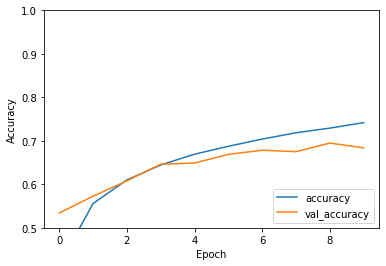

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

### **6-1. Evaluate the model**

In [11]:
model.evaluate(test_x, test_y, verbose=2)

313/313 - 1s - loss: 0.9170 - accuracy: 0.6839 - 1s/epoch - 4ms/step


[0.9169860482215881, 0.683899998664856]

### **5-2. Build/Compile/Train the model+Dropout**

In [12]:
model_revised = models.Sequential()
model_revised.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_revised.add(layers.MaxPooling2D((2, 2)))
model_revised.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_revised.add(layers.MaxPooling2D((2, 2)))
model_revised.add(layers.Dropout(0.2))
model_revised.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_revised.add(layers.MaxPooling2D((2, 2)))
model_revised.add(layers.Dropout(0.2))
model_revised.add(layers.Flatten())
model_revised.add(layers.Dense(64, activation='relu'))
model_revised.add(layers.Dense(10))

In [13]:
model_revised.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)         

In [14]:
model_revised.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_revised.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6175 - accuracy: 0.4018 - val_loss: 1.3466 - val_accuracy: 0.5166
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3041 - accuracy: 0.5327 - val_loss: 1.2014 - val_accuracy: 0.5772
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1783 - accuracy: 0.5825 - val_loss: 1.0850 - val_accuracy: 0.6252
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0899 - accuracy: 0.6138 - val_loss: 1.0438 - val_accuracy: 0.6315
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0341 - accuracy: 0.6351 - val_loss: 0.9809 - val_accuracy: 0.6577
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9912 - accuracy: 0.6504 - val_loss: 0.9380 - val_accuracy: 0.6729
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9498 - accuracy: 0.6646 - val_loss: 0.8731 - val_accuracy

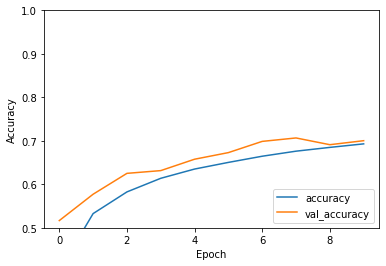

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

### **6-2. Evaluate the model**

In [16]:
model_revised.evaluate(test_x, test_y, verbose=2)

313/313 - 1s - loss: 0.8649 - accuracy: 0.7003 - 796ms/epoch - 3ms/step


[0.8649307489395142, 0.7002999782562256]

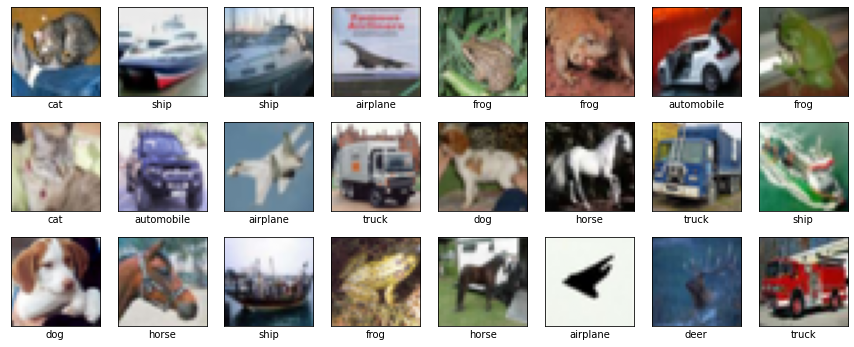

In [17]:
plt.figure(figsize=(15, 6))
for i in range(24):
    plt.subplot(3, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_x[i])
    plt.xlabel(class_names[test_y[i][0]])
plt.show()